## q-2-3

In [1]:
import pandas as pd
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
import numpy as np
import sklearn as sk
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score
np.seterr(divide='ignore', invalid='ignore')

from pylab import *
import matplotlib
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv("../input_data/AdmissionDataset/data.csv")

In [3]:
def run(t):
    df = df1.copy(deep=True)
    threshold = t
    df.loc[df['Chance of Admit ']<threshold,'Chance of Admit '] = 0
    df.loc[df['Chance of Admit ']>=threshold,'Chance of Admit '] = 1
    X = df.drop(['Serial No.','Chance of Admit '],axis=1)
    Y = df['Chance of Admit ']

    col_names = [i for i in X]
    X = pd.DataFrame(preprocessing.scale(X), columns = col_names)

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

    X_train1 = X_train.reset_index(drop=True)
    Y_train1 = Y_train.reset_index(drop=True)

    ones = pd.DataFrame(1,index=np.arange(X_train.shape[0]),columns=["ones"])
    X_train1 = pd.concat([ones, X_train1],axis=1)
    X_train1 = np.array(X_train1)
    Y_train1 = np.array(Y_train1).reshape(X_train1.shape[0],1)

    theta = np.zeros([1,8])
    alpha = 0.01
    iterations = 1000

    def h(X):
        X=-X
        return 1/(1+np.exp(X))

    def gradientDescent(X,Y,theta,it,alpha):
        for i in range(it):
            theta = theta - (alpha) * np.sum(X * (h(np.matmul(X, theta.T)) - Y), axis=0)
        return theta

    g = gradientDescent(X_train1,Y_train1,theta,iterations,alpha)
    theta_list = g[0]

    def predict(X_test):
        Y_pred=[]
        for index,row in X_test.iterrows():
            row=list(row)
            y1=0
            for i in range(1,8):
                y1=y1+theta_list[i]*row[i-1]
            y1=y1+theta_list[0]
            Y_pred.append(0 if y1<0.5 else 1)
        return Y_pred
    pred = predict(X_test)

    # print r2_score(list(Y_test),pred)
    # print theta_list

    
    average_precision = average_precision_score(Y_test, pred)
    recall_value = recall_score(Y_test, pred)
#     print confusion_matrix(Y_test,pred)
#     print classification_report(Y_test,pred)
    accuracy = accuracy_score(Y_test,pred)
    return accuracy,average_precision,recall_value

/home/priyendu/.local/lib/python2.7/site-packages/ipykernel_launcher.py:10: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # Remove the CWD from sys.path while we load stuff.


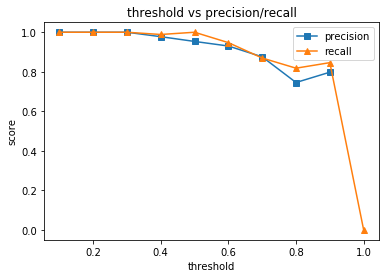

In [4]:
x = np.arange(0.1, 1.1, 0.1)
accuracy_list = []
precision_list = []
recall_list = []
for i in x:
    a,b,c = run(i)
    accuracy_list.append(a)
    precision_list.append(b)
    recall_list.append(c)

fig,ax = plt.subplots()
ax.plot(x, precision_list, label="precision",marker='s')
ax.plot(x,recall_list,label="recall",marker='^')
ax.legend()
ax.set_xlabel("threshold")
ax.set_ylabel("score")
ax.set_title("threshold vs precision/recall")
show()